n_Gauss1           ==> (2.5+/-3.3)e+02
Gauss1_mean        ==> 750.48+/-0.09
Gauss1_sigma       ==> 1.7+/-2.1
n_Gauss2           ==> (4.0+/-3.4)e+02
Gauss2_mean        ==> 750.48+/-0.09
Gauss2_sigma       ==> 1.7+/-1.1
n_bkg              ==> (5+/-5)e+01
bkg_bkg_0          ==> -1.0+/-1.2


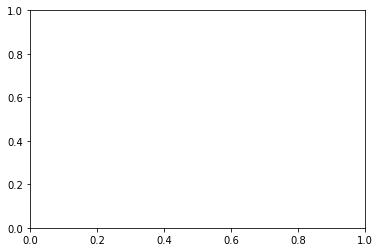

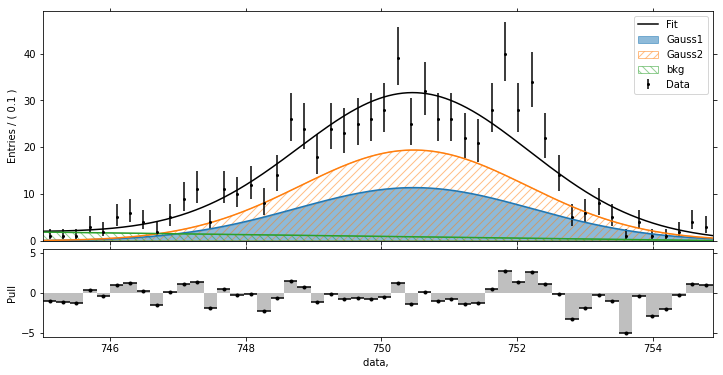

[#1] INFO:Minization -- RooMinimizer::optimizeConst: activating const optimization
[#1] INFO:Minization --  The following expressions will be evaluated in cache-and-track mode: (Gauss1,Gauss2,bkg)
[#1] INFO:Fitting -- RooAbsPdf::fitTo(model) Calculating sum-of-weights-squared correction matrix for covariance matrix
[#1] INFO:Minization -- RooMinimizer::optimizeConst: deactivating const optimization


Warning in <TROOT::Append>: Replacing existing TH1: model__mass (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: Gauss1__mass (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: Gauss2__mass (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: bkg__mass (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: model__mass (Potential memory leak).


In [7]:
%matplotlib inline
from pyroofit.models import HistPDF
from pyroofit.composites import AddPdf
from pyroofit.plotting import *
import numpy as np
import ROOT
import matplotlib.pyplot as plt
import pandas as pd
from pyroofit.models import Gauss, Chebychev
from pyroofit.composites import AddPdf
import numpy as np
import pandas as pd
import ROOT


dist_signal = np.append(np.random.normal(750, 1.5, 500), np.random.normal(752, .5, 100))
dist_background = np.random.random_sample(100)*10 + 745,
df = pd.DataFrame({'mass': np.append(dist_signal, dist_background)})


x = ROOT.RooRealVar('mass', 'M', 750, 745, 755, 'GeV')  # or x = ('mass', 745, 755)

pdf_sig1 = Gauss(x, mean=(745, 755), sigma=(0.1, 1, 2), name="Gauss1")
# We want to furthermore constrain the mean to be the same
pdf_sig2 = Gauss(x, mean=pdf_sig1.parameters.mean, sigma=(0.1, 1, 2), name="Gauss2")

pdf_bkg = Chebychev(x, n=1, name="bkg")

pdf = AddPdf([pdf_sig1, pdf_sig2, pdf_bkg], name="model")

pdf.fit(df)
# pdf.plot('multiple_pdfs.pdf', legend=True)
pdf.get()
plot_as_pyplot(pdf, df.mass, figsize=[12,6])
plt.show()